In [1]:
# organize imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:

# fix a random seed for reproducibility
np.random.seed(9)

# user inputs
nb_epoch            = 25
num_classes         = 10
batch_size          = 64
train_size          = 60000
test_size           = 10000
v_length            = 784
model_save_path     = "output/mlp"

# split the mnist data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

# reshape and scale the data
trainData   = trainData.reshape(train_size, v_length)
testData    = testData.reshape(test_size, v_length)
trainData   = trainData.astype("float32")
testData    = testData.astype("float32")
trainData  /= 255
testData   /= 255

# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels  = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels   = np_utils.to_categorical(testLabels, num_classes)

# create the MLP model
model = Sequential()
model.add(Dense(512, input_shape=(v_length,)))
model.add(Activation("relu"))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# compile the model
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

# fit the model
history = model.fit(trainData, 
                    mTrainLabels,
                    validation_data=(testData, mTestLabels),
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=2)

# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# print the results
print ("[INFO] test score - {}".format(scores[0]))
print ("[INFO] test accuracy - {}".format(scores[1]))

/home/anupam/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:50: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 7s - loss: 0.2106 - acc: 0.9373 - val_loss: 0.1091 - val_acc: 0.9665
Epoch 2/25
 - 7s - loss: 0.0830 - acc: 0.9741 - val_loss: 0.0846 - val_acc: 0.9717
Epoch 3/25
 - 7s - loss: 0.0566 - acc: 0.9821 - val_loss: 0.0744 - val_acc: 0.9766
Epoch 4/25
 - 7s - loss: 0.0413 - acc: 0.9866 - val_loss: 0.0648 - val_acc: 0.9805
Epoch 5/25
 - 7s - loss: 0.0321 - acc: 0.9895 - val_loss: 0.0787 - val_acc: 0.9781
Epoch 6/25
 - 7s - loss: 0.0263 - acc: 0.9909 - val_loss: 0.0727 - val_acc: 0.9798
Epoch 7/25
 - 7s - loss: 0.0219 - acc: 0.9927 - val_loss: 0.0744 - val_acc: 0.9792
Epoch 8/25
 - 7s - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0793 - val_acc: 0.9798
Epoch 9/25
 - 7s - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0843 - val_acc: 0.9810
Epoch 10/25
 - 7s - loss: 0.0153 - acc: 0.9949 - val_loss: 0.0843 - val_acc: 0.9804
Epoch 11/25
 - 7s - loss: 0.0163 - acc: 0.9946 - val_loss: 0.0943 - val_acc: 0.9792
Epoch 12/25
 - 7s - loss: 0.0115 - 

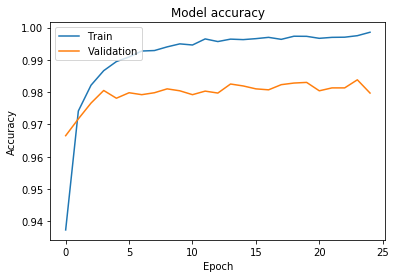

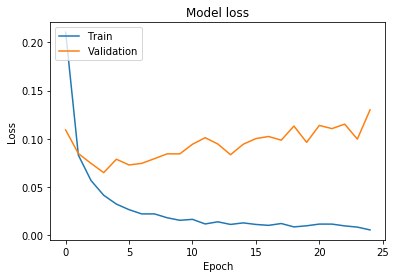

In [3]:

# Plot training & validation accuracy values
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [4]:
import cv2

count = 0

In [31]:


x= np.load("nums.npy")
ls = x.reshape(81,784)

temp = []
for img in ls:
    temp.append(int(np.average(img)))
temp = np.asarray(temp)

x = x[temp>5]

In [32]:
cls = model.predict_classes(ls[temp > 5])

for i in range(x.shape[0]):
    cv2.imwrite('./dataset/'+str(cls[i]) + '/'+str(count)+'.jpg',x[i])
    count = count+1